In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from sqlalchemy import Column, Integer, String, ForeignKey, create_engine
from sqlalchemy.orm import declarative_base, relationship, sessionmaker
from faker import Faker
import random

In [2]:
vg_sales = pd.read_csv('vgsales.csv')
vg_sales

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

# MCD
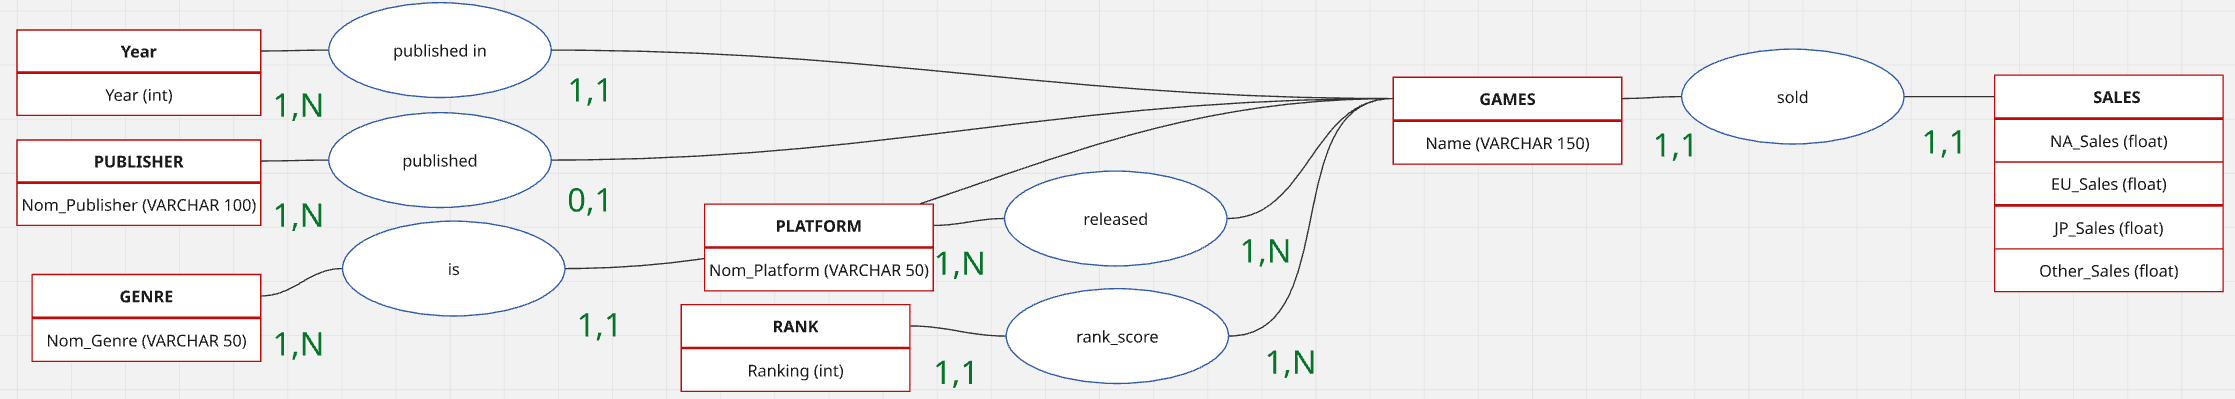
# MLD
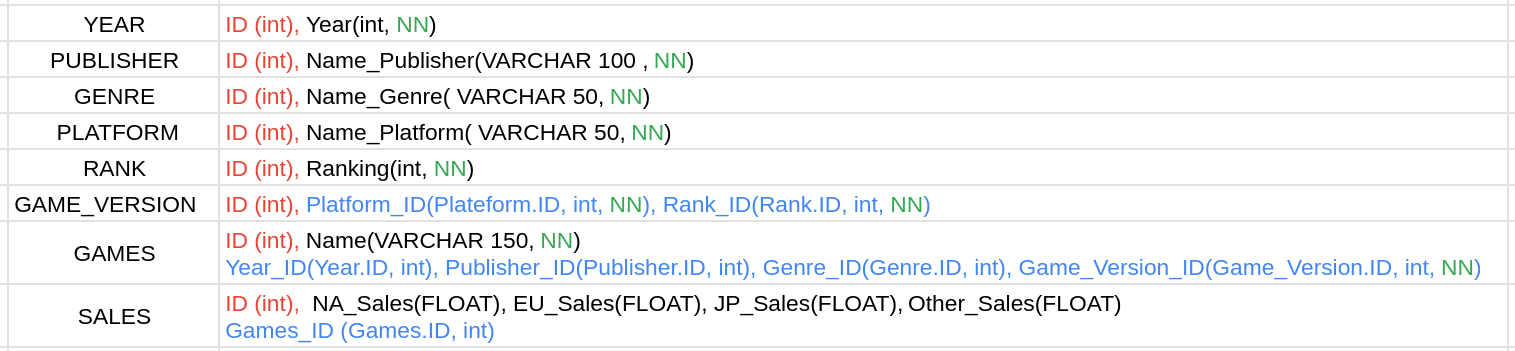
# MPD
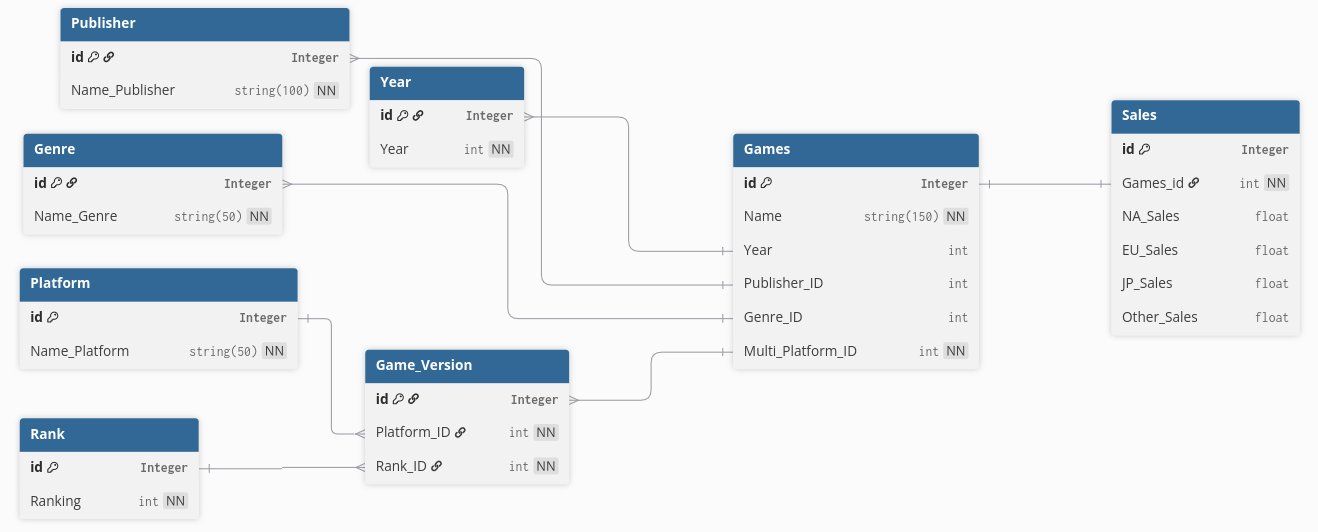

In [3]:
Base = declarative_base()

class Platform(Base):
    __tablename__='platforms'

    id = Column(Integer, primary_key=True)
    name = Column(String(50), nullable=False, unique=True)

    game_versions = relationship('GameVersion', back_populates= 'platform')


class Rank(Base):
    __tablename__='ranks'

    id = Column(Integer, primary_key=True)
    ranking = Column(Integer, nullable=False, unique=True)

    game_versions = relationship('GameVersion', back_populates= 'rank')

class GameVersion(Base):
    __tablename__ = 'game_versions'

    id = Column(Integer, primary_key=True)

    platform_id = Column(Integer, ForeignKey('platforms.id'), nullable=False)
    platform = relationship('Platform', back_populates= 'game_versions')

    rank_id = Column(Integer, ForeignKey('ranks.id'), nullable=False)
    rank = relationship('Rank', back_populates= 'game_versions')

    game = relationship('Game', back_populates='game_version')

class Publisher(Base):
    __tablename__ = 'publishers'

    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False, unique=True)

    game = relationship('Game', back_populates='publisher')

class Genre(Base):
    __tablename__ = 'genres'

    id = Column(Integer, primary_key=True)
    name = Column(String(50), nullable=False, unique=True)

    game = relationship('Game', back_populates='genre')

class Year(Base):
    __tablename__ = 'years'

    id = Column(Integer, primary_key=True)
    year_date = Column(Integer, nullable=False, unique=True)

    game = relationship('Game', back_populates='year')

class Game(Base):
    __tablename__ = 'games'

    id = Column(Integer, primary_key=True)
    name = Column(String(150), nullable=False, unique=True)

    year_id = Column(Integer, ForeignKey('years.id'))
    year = relationship('Year', back_populates='game')

    publisher_id = Column(Integer, ForeignKey('publishers.id'))
    publisher = relationship ('Publisher', back_populates='game')

    genre_id = Column(Integer, ForeignKey('genres.id'))
    genre = relationship('Genre', back_populates='game')

    game_version_id = Column(Integer, ForeignKey('game_versions.id'), nullable=False)
    game_version = relationship('GameVersion', back_populates='game')

    sale = relationship('Sale', back_populates='game')

    transaction = relationship('Transaction', back_populates='game')

class Sale(Base):
    __tablename__ = 'sales'

    id = Column (Integer, primary_key=True)
    na_sales = Column(Integer)
    eu_sales = Column(Integer)
    jp_sales = Column(Integer)
    other_sales = Column(Integer)

    game_id = Column(Integer, ForeignKey('games.id'), nullable=False)
    game = relationship('Game', back_populates='sale')


class Region(Base):
    __tablename__ = 'regions'

    id = Column(Integer, primary_key=True)
    name = Column(String(30), nullable=False, unique=True)

    country = relationship('Country', back_populates='region') 

class Country(Base):
    __tablename__ = 'countries'

    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False, unique=True)

    region_id = Column(Integer, ForeignKey('regions.id'), nullable=False)
    region = relationship('Region', back_populates='country')

    city = relationship('City', back_populates='country')

class City(Base):
    __tablename__ = 'cities'

    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False, unique=True)

    country_id = Column(Integer, ForeignKey('countries.id'), nullable=False)
    country = relationship('Country', back_populates='city')

    post_code = relationship('PostCode', back_populates='city')

class PostCode(Base):
    __tablename__ = 'post_codes'

    id = Column(Integer, primary_key=True)
    code = Column(String(10), nullable=False, unique=True)

    city_id = Column(Integer, ForeignKey('cities.id'), nullable=False)
    city = relationship('City', back_populates='post_code')

    user = relationship('User', back_populates='post_code')

class User(Base):
    __tablename__ = 'users'

    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False)
    email = Column(String(255), nullable=False, unique=True)
    phone_number = Column(String(15), nullable=False, unique=True)
    address = Column(String(150), nullable=False)

    post_code_id = Column(Integer, ForeignKey('post_codes.id'), nullable=False)
    post_code = relationship('PostCode', back_populates='user')

    transaction = relationship('Transaction', back_populates='user')

class Transaction(Base):
    __tablename__ = 'transactions'

    id = Column(Integer, primary_key=True)
    quantity = Column (Integer, nullable=False)

    game_id = Column(Integer, ForeignKey('games.id'), nullable=False)
    game = relationship('Game', back_populates='transaction')

    user_id = Column(Integer, ForeignKey('users.id'), nullable=False)
    user = relationship('User', back_populates='transaction')


In [4]:
engine = create_engine("sqlite:///video_games_sales.db", echo=True)

Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

2025-11-28 18:15:15,824 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-28 18:15:15,824 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("platforms")
2025-11-28 18:15:15,825 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-28 18:15:15,826 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("platforms")
2025-11-28 18:15:15,826 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-28 18:15:15,826 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("ranks")
2025-11-28 18:15:15,827 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-28 18:15:15,827 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("ranks")
2025-11-28 18:15:15,828 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-28 18:15:15,828 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("game_versions")
2025-11-28 18:15:15,829 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-28 18:15:15,829 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("game_versions")
2025-11-28 18:15:15,829 INFO sqlalchemy.engine.Engine 

In [5]:
vg_sales

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [6]:
users_list = []
fake = Faker('fr_FR')
for _ in range(2**6):
    name = fake.name()
    email = fake.email()
    phone_number = fake.phone_number()
    try:
        address, city_code = fake.address().split('\n')
        post_code, city_name = city_code.split(' ', 1)
    except: 
        continue
    region_name = random.choice(['EU', 'US', 'JP', 'Other'])
    region_name_db = session.query(Region).filter_by(name = region_name).first()

    if not region_name_db:
        region_name_db = Region(name = region_name)
        session.add(region_name_db)
        session.flush()

    country_name = fake.country()
    country_name_db = session.query(Country).filter_by(name = country_name).first()
    if not country_name_db:
        country_name_db = Country(name = country_name, region = region_name_db)
        session.add(country_name_db)
        session.flush()
    
    city_name_db = session.query(City).filter_by(name = city_name).first()
    if not city_name_db:
        city_name_db = City(name = city_name, country = country_name_db)
        session.add(city_name_db)
        session.flush()
    
    post_code_db = session.query(PostCode).filter_by(code = post_code).first()
    if not post_code_db:
        post_code_db = PostCode(code = post_code, city = city_name_db)
        session.add(post_code_db)
        session.flush()

    users_list.append(User(name= name, email = email, phone_number = phone_number, address = address, post_code = post_code_db))

session.add_all(users_list)
session.commit()

2025-11-28 18:15:15,976 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-28 18:15:15,978 INFO sqlalchemy.engine.Engine SELECT regions.id AS regions_id, regions.name AS regions_name 
FROM regions 
WHERE regions.name = ?
 LIMIT ? OFFSET ?
2025-11-28 18:15:15,979 INFO sqlalchemy.engine.Engine [generated in 0.00059s] ('JP', 1, 0)
2025-11-28 18:15:15,980 INFO sqlalchemy.engine.Engine INSERT INTO regions (name) VALUES (?)
2025-11-28 18:15:15,981 INFO sqlalchemy.engine.Engine [generated in 0.00036s] ('JP',)
2025-11-28 18:15:15,982 INFO sqlalchemy.engine.Engine SELECT countries.id AS countries_id, countries.name AS countries_name, countries.region_id AS countries_region_id 
FROM countries 
WHERE countries.name = ?
 LIMIT ? OFFSET ?
2025-11-28 18:15:15,983 INFO sqlalchemy.engine.Engine [generated in 0.00036s] ('Cameroun', 1, 0)
2025-11-28 18:15:15,984 INFO sqlalchemy.engine.Engine INSERT INTO countries (name, region_id) VALUES (?, ?)
2025-11-28 18:15:15,984 INFO sqlalchemy.engine.Engine [

/tmp/ipykernel_344164/3754699484.py:13: SAWarning: Object of type <User> not in session, add operation along 'PostCode.user' will not proceed (This warning originated from the Session 'autoflush' process, which was invoked automatically in response to a user-initiated operation. Consider using ``no_autoflush`` context manager if this warning happened while initializing objects.)
  region_name_db = session.query(Region).filter_by(name = region_name).first()


2025-11-28 18:15:16,194 INFO sqlalchemy.engine.Engine [cached since 0.206s ago] ('Andreboeuf', 19)
2025-11-28 18:15:16,195 INFO sqlalchemy.engine.Engine SELECT post_codes.id AS post_codes_id, post_codes.code AS post_codes_code, post_codes.city_id AS post_codes_city_id 
FROM post_codes 
WHERE post_codes.code = ?
 LIMIT ? OFFSET ?
2025-11-28 18:15:16,195 INFO sqlalchemy.engine.Engine [cached since 0.205s ago] ('36566', 1, 0)
2025-11-28 18:15:16,196 INFO sqlalchemy.engine.Engine INSERT INTO post_codes (code, city_id) VALUES (?, ?)
2025-11-28 18:15:16,196 INFO sqlalchemy.engine.Engine [cached since 0.2041s ago] ('36566', 20)
2025-11-28 18:15:16,197 INFO sqlalchemy.engine.Engine SELECT regions.id AS regions_id, regions.name AS regions_name 
FROM regions 
WHERE regions.name = ?
 LIMIT ? OFFSET ?
2025-11-28 18:15:16,197 INFO sqlalchemy.engine.Engine [cached since 0.2189s ago] ('JP', 1, 0)
2025-11-28 18:15:16,197 INFO sqlalchemy.engine.Engine SELECT countries.id AS countries_id, countries.name

In [7]:
session.close()
engine.dispose()

In [8]:
len(vg_sales['Publisher'].unique())

579

In [9]:
vg_sales.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [10]:
len(vg_sales['Publisher'].dropna().unique())

578

In [11]:
def feed_columns_to_db(session, df, classes):
    """
    Populates lookup tables using 'get or create' logic to avoid IntegrityErrors.
    """
    results = {}
    
    # Extract column names corresponding to classes (e.g., Genre, Publisher, Platform)
    column_names = [cls.__name__ for cls in classes]
    
    # First, rollback the current session to clear the previous error state
    session.rollback() 
    print("Session transaction rolled back to clear previous error.")
    
    # Process each class/column pair
    for col_name, class_ in zip(column_names, classes):
        unique_values = []
        try:
            # Get the unique names from the DataFrame column
            unique_names = df[col_name].dropna().unique()
            
            # Use 'get or create' logic
            for name in unique_names:
                # 1. Check if the object already exists in the database
                existing_obj = session.query(class_).filter(class_.name == name).one_or_none()
                
                if existing_obj is None:
                    # 2. If it doesn't exist, create a new object and add it to the session
                    new_obj = class_(name=name)
                    session.add(new_obj)
                    unique_values.append(new_obj)
                else:
                    # 3. If it exists, append the existing object
                    unique_values.append(existing_obj)

            results[class_.__name__.lower() + '_list'] = unique_values
            
        except KeyError:
            print(f'Column "{col_name}" not found in DataFrame.')
    
    return results

classes = [Genre, Publisher, Platform]
fact_tables = feed_columns_to_db(session, vg_sales, classes)

# 2. Handle Year and Rank separately (assuming they also need unique checking, 
# or you can refactor the function to handle different attribute names like 'year_date' and 'ranking')
# ... (Year/Rank lists are assumed to be handled separately for this example)
# fact_tables['year_list'] =  year_list
# fact_tables['rank_list'] =  rank_list

# 3. Commit the entire transaction once
'''
try:
    session.commit()
    print("\nDatabase population successful: New records inserted and transaction committed.")
except Exception as e:
    print(f"\nFinal Commit Failed: {e}")
    session.rollback()
'''

Session transaction rolled back to clear previous error.
2025-11-28 18:15:16,785 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-28 18:15:16,786 INFO sqlalchemy.engine.Engine SELECT genres.id AS genres_id, genres.name AS genres_name 
FROM genres 
WHERE genres.name = ?
2025-11-28 18:15:16,787 INFO sqlalchemy.engine.Engine [generated in 0.00057s] ('Sports',)
2025-11-28 18:15:16,788 INFO sqlalchemy.engine.Engine INSERT INTO genres (name) VALUES (?)
2025-11-28 18:15:16,788 INFO sqlalchemy.engine.Engine [generated in 0.00044s] ('Sports',)
2025-11-28 18:15:16,789 INFO sqlalchemy.engine.Engine SELECT genres.id AS genres_id, genres.name AS genres_name 
FROM genres 
WHERE genres.name = ?
2025-11-28 18:15:16,789 INFO sqlalchemy.engine.Engine [cached since 0.003509s ago] ('Platform',)
2025-11-28 18:15:16,790 INFO sqlalchemy.engine.Engine INSERT INTO genres (name) VALUES (?)
2025-11-28 18:15:16,791 INFO sqlalchemy.engine.Engine [cached since 0.002783s ago] ('Platform',)
2025-11-28 18:15:16,

'\ntry:\n    session.commit()\n    print("\nDatabase population successful: New records inserted and transaction committed.")\nexcept Exception as e:\n    print(f"\nFinal Commit Failed: {e}")\n    session.rollback()\n'

In [12]:
def feed_columns_to_db(df, classes):
    results = {}
    class_names = [cls.__name__ for cls in classes]
    session.rollback()
    for col_name, class_ in zip(class_names, classes):
        unique_values = []
        try :
            unique_names = df[col_name].dropna().unique()
            for name in unique_names:
                existing_obj = session.query(class_).filter(class_.name == name).one_or_none()
                if existing_obj is None:
                    new_obj = class_(name=name)
                    session.add(new_obj)
                    unique_values.append(new_obj)
                else:
                    unique_values.append(existing_obj)
            results[class_.__name__.lower()+'_list'] = unique_values
        except:
            print(f'Column {col_name} not found in database')
    return results

year_list = [Year(year_date = i) for i in vg_sales.Year.dropna().unique()]
rank_list = [Rank(ranking = i) for i in vg_sales.Rank.unique()]

classes = [Genre, Publisher, Platform]
fact_tables = feed_columns_to_db(vg_sales, classes)
fact_tables['year_list'] =  year_list
fact_tables['rank_list'] =  rank_list
for tables_list in fact_tables.values():
        session.add_all(tables_list)
        session.commit()

2025-11-28 18:15:18,308 INFO sqlalchemy.engine.Engine ROLLBACK
2025-11-28 18:15:18,312 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-28 18:15:18,313 INFO sqlalchemy.engine.Engine SELECT genres.id AS genres_id, genres.name AS genres_name 
FROM genres 
WHERE genres.name = ?
2025-11-28 18:15:18,313 INFO sqlalchemy.engine.Engine [cached since 1.528s ago] ('Sports',)
2025-11-28 18:15:18,315 INFO sqlalchemy.engine.Engine INSERT INTO genres (name) VALUES (?)
2025-11-28 18:15:18,315 INFO sqlalchemy.engine.Engine [cached since 1.527s ago] ('Sports',)
2025-11-28 18:15:18,316 INFO sqlalchemy.engine.Engine SELECT genres.id AS genres_id, genres.name AS genres_name 
FROM genres 
WHERE genres.name = ?
2025-11-28 18:15:18,316 INFO sqlalchemy.engine.Engine [cached since 1.53s ago] ('Platform',)
2025-11-28 18:15:18,317 INFO sqlalchemy.engine.Engine INSERT INTO genres (name) VALUES (?)
2025-11-28 18:15:18,318 INFO sqlalchemy.engine.Engine [cached since 1.53s ago] ('Platform',)
2025-11-28 18:15:1

In [13]:
genre_list = [Genre(name = i) for i in vg_sales.Genre.unique()]
for i in range (len(genre_list)):
    print(genre_list[i].name)

Sports
Platform
Racing
Role-Playing
Puzzle
Misc
Shooter
Simulation
Action
Fighting
Adventure
Strategy


In [14]:
try:
    for tables_list in fact_tables.values():
        session.add_all(tables_list)
        session.commit()
except Exception as e:
    session.rollback()
    print(e)

In [15]:
for tables_list in fact_tables.values():
    session.add_all(tables_list)
    session.commit()

In [16]:
vg_sales.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [17]:
vg_sales.Publisher.isna().value_counts()

Publisher
False    16540
True        58
Name: count, dtype: int64

In [18]:
vg_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64